In [144]:
%pylab inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import label_binarize 
from sklearn.multiclass import OneVsRestClassifier 
from scipy import interp
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [145]:
data = pd.read_csv('CSA_monomers_combined.csv')

In [146]:
data['ground_binary'] = data['ground'].map(lambda x: 0 if x == 'Neutral' else 1)

In [147]:
data.head()

,ground,unipro,refseq,aa_pos,wild_aa,mut_aa,pdbid,ResI,fafsa_ind,pctfdfi,pctdfi,ground_binary
0,Neutral,O14983,NP_775293,6,A,S,3tlm,6,6,0.424395,0.639113,0
1,Neutral,O14983,NP_775293,8,T,S,3tlm,8,8,0.248992,0.609879,0
2,Neutral,O14983,NP_775293,14,A,S,3tlm,14,14,0.067540,0.493952,0
3,Neutral,O14983,NP_775293,32,N,H,3tlm,32,32,0.147177,0.437500,0
4,Neutral,O14983,NP_775293,38,L,H,3tlm,38,38,0.234879,0.334677,0


In [190]:
def plot_ROC(X,y,features):
    sns.set_style('white')
    plt.figure(figsize=(22,12))
    sns.set_context("poster", font_scale=2.5, rc={"lines.linewidth": 2.25, "lines.markersize": 8 })
    n_classes = y.shape[1]
    n_samples, n_feature = X.shape
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9,random_state=0)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    y_score.shape
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr[i].shape
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.4f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC '+features)
    plt.legend(loc="lower right",fontsize='small')
   



In [191]:
X = data[['pctdfi']].values
y = label_binarize(data['ground_binary'].values,classes=[0,1])

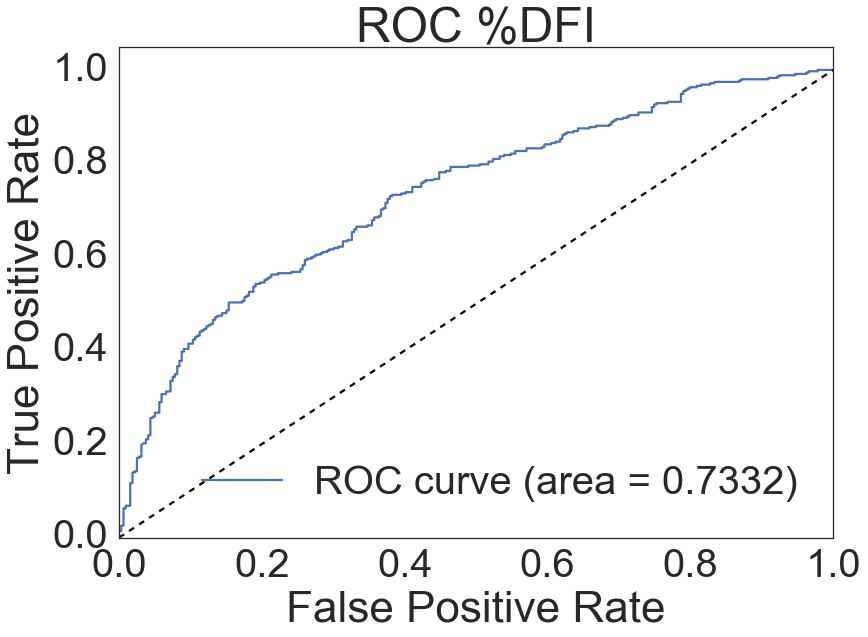

In [192]:
plot_ROC(X,y,'%DFI')

In [193]:
X = data[['pctfdfi']].values
y = label_binarize(data['ground_binary'].values,classes=[0,1])

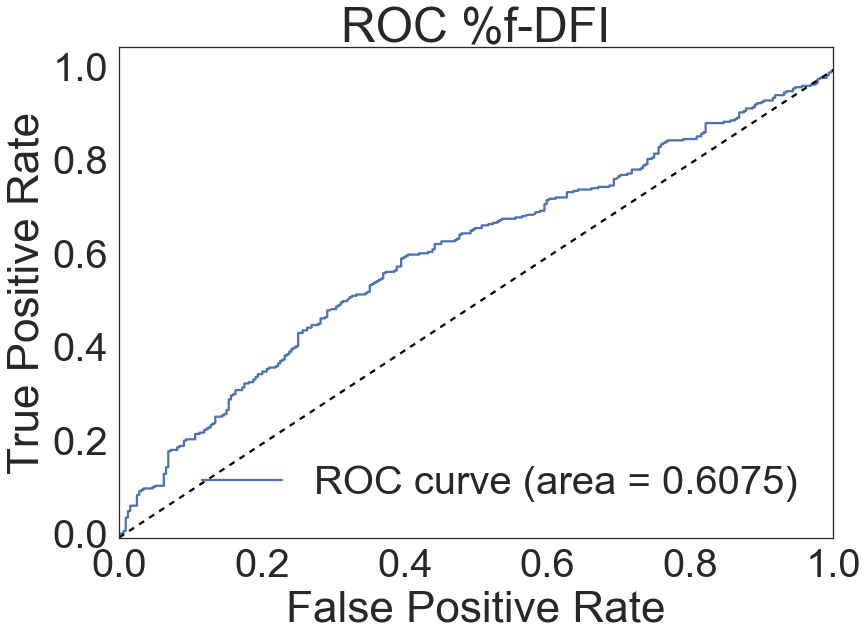

In [194]:
plot_ROC(X,y,'%f-DFI')

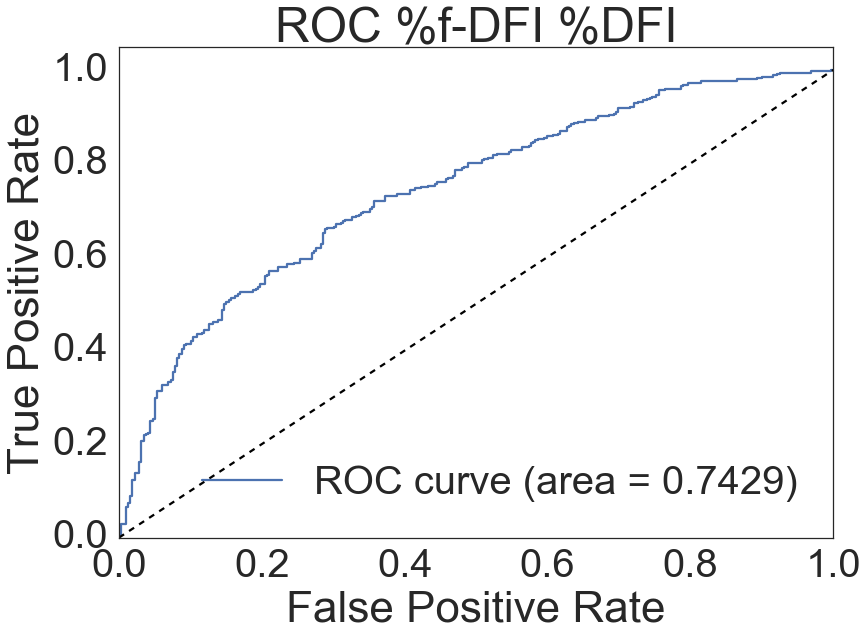

In [195]:
X = data[['pctfdfi','pctdfi']].values
y = label_binarize(data['ground_binary'].values,classes=[0,1])
plot_ROC(X,y,'%f-DFI %DFI')